Importing libraries

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

reading and inspecting data

In [230]:
customers = pd.read_csv('customers_dataset.csv')

In [231]:
customers.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [232]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


viewing distribution using histograms

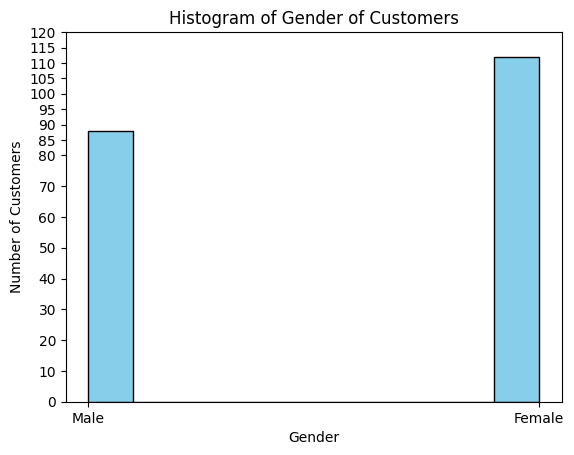

In [233]:
plt.hist(customers['Gender'], edgecolor='black', color='skyblue')
plt.yticks(ticks = [0,10,20,30,40,50,60,70,80,85,90,95,100,105,110,115,120])
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Histogram of Gender of Customers')
plt.show()

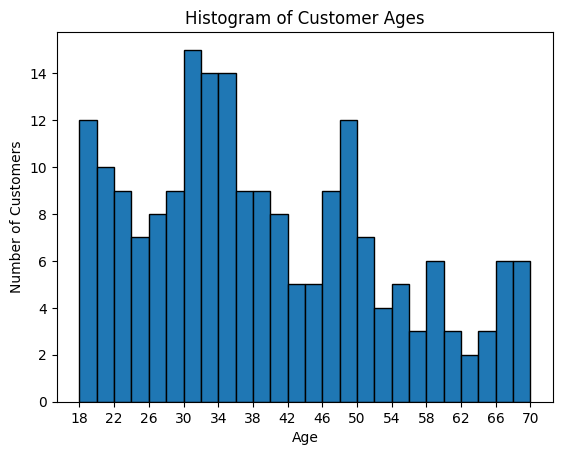

In [234]:
plt.hist(customers['Age'], bins=26, edgecolor='black')
plt.xlabel('Age')
plt.xticks(ticks = [18,22, 26, 30, 34, 38, 42, 46, 50, 54, 58, 62, 66, 70])
plt.ylabel('Number of Customers')
plt.title('Histogram of Customer Ages')
plt.show()

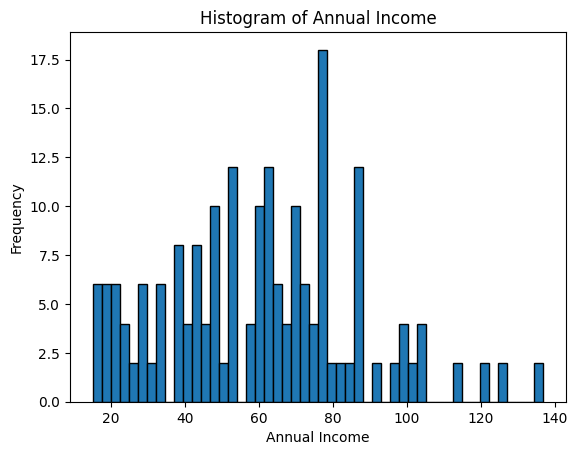

In [235]:
plt.hist(customers['Annual Income (k$)'],bins=50,  edgecolor='black')
plt.xlabel('Annual Income')

plt.ylabel('Frequency')
plt.title('Histogram of Annual Income')
plt.show()

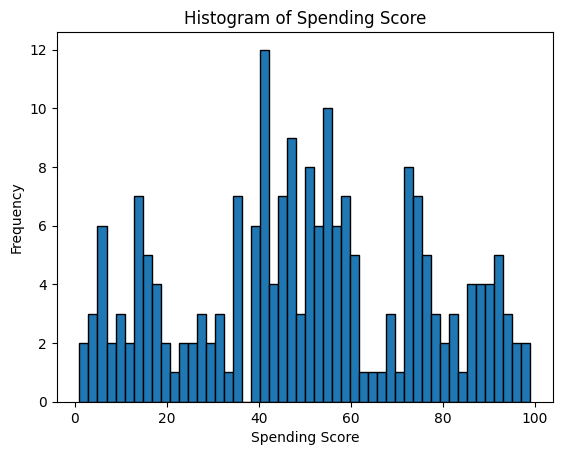

In [236]:
plt.hist(customers['Spending Score (1-100)'],bins=50,  edgecolor='black')
plt.xlabel('Spending Score')

plt.ylabel('Frequency')
plt.title('Histogram of Spending Score')
plt.show()

Plotting Boxplots of numeric features i.e Age , anuual income and spending score

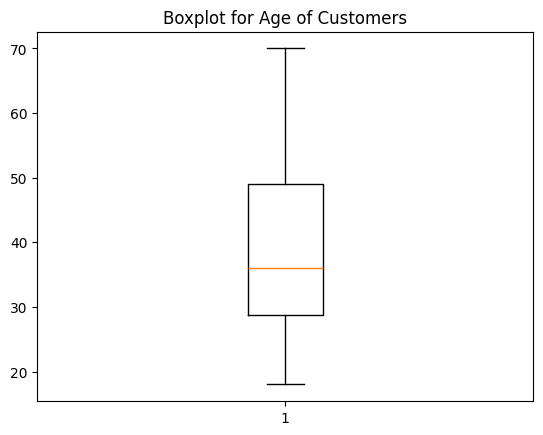

In [237]:
plt.boxplot(customers['Age'])
plt.title('Boxplot for Age of Customers')
plt.show()

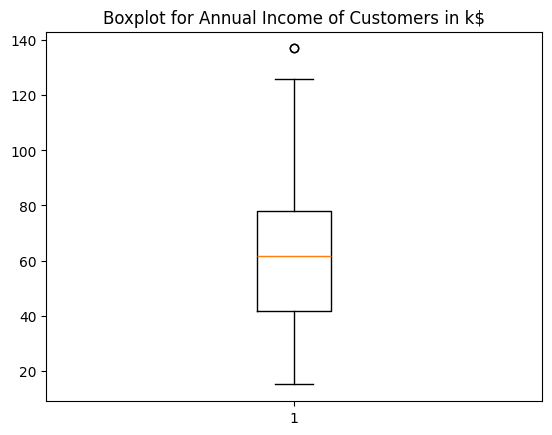

In [238]:
plt.boxplot(customers['Annual Income (k$)'])
plt.title('Boxplot for Annual Income of Customers in k$')
plt.show()

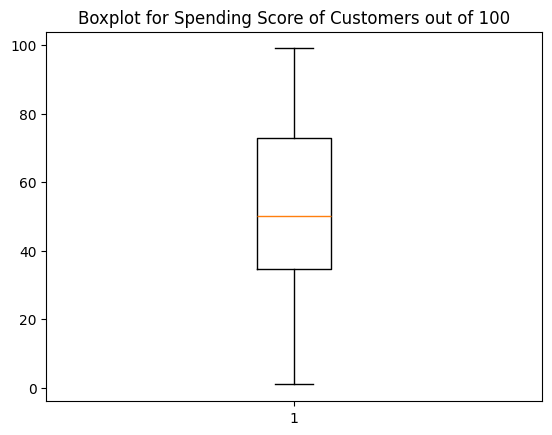

In [239]:
plt.boxplot(customers['Spending Score (1-100)'])
plt.title('Boxplot for Spending Score of Customers out of 100')
plt.show()

Plotting Scater plots

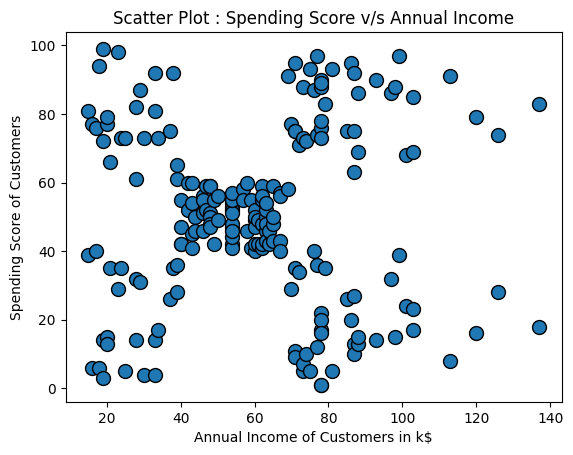

In [240]:
plt.scatter(customers['Annual Income (k$)'] , customers['Spending Score (1-100)'] , edgecolors = 'Black' , s=100)
plt.xlabel('Annual Income of Customers in k$')
plt.ylabel('Spending Score of Customers')
plt.title('Scatter Plot : Spending Score v/s Annual Income')
plt.show()

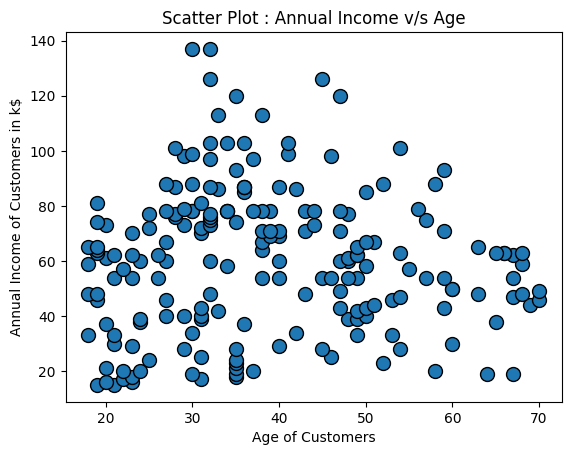

In [241]:
plt.scatter(customers['Age'] , customers['Annual Income (k$)'] , edgecolors = 'Black', s=100)
plt.xlabel('Age of Customers')
plt.ylabel('Annual Income of Customers in k$')
plt.title('Scatter Plot : Annual Income v/s Age')
plt.show()

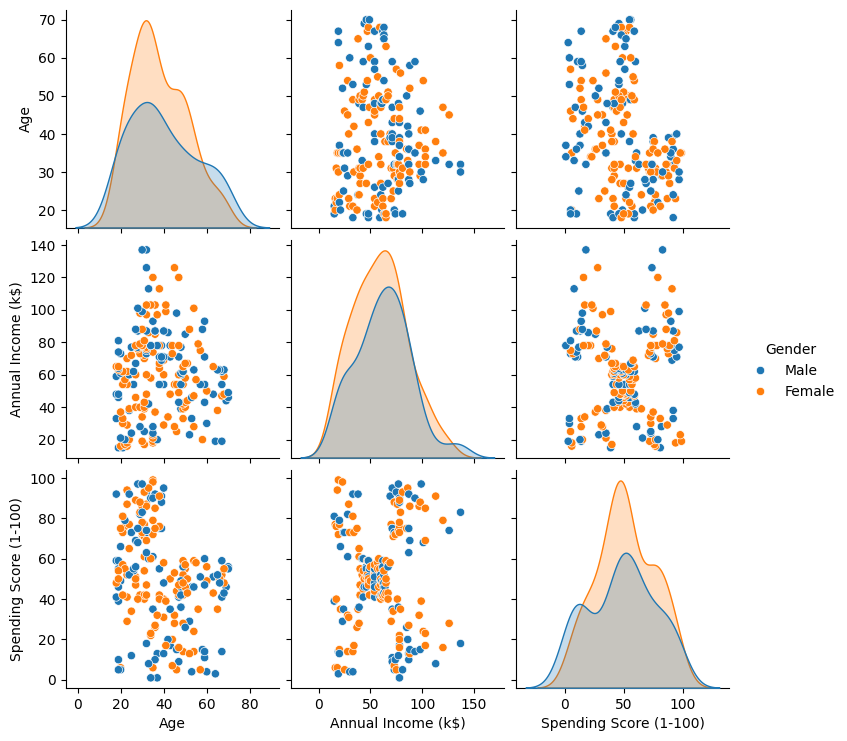

In [242]:
sns.pairplot(customers, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'] , hue = 'Gender', kind = 'scatter' , diag_kind = 'kde')
plt.show()

using scipy to view skew of features

In [243]:
import scipy
from scipy.stats import skew
print(skew(customers['Age']))

0.48191947090957177


by observartion Age is skewed on right side also the calculated value is 0.4819 which is positive, thus we use log-transform on this feature to reduce skewness

In [244]:
customers['log_Age'] = np.log(customers['Age'])

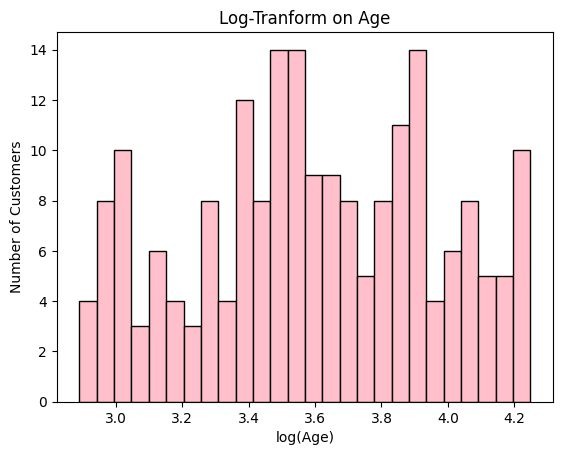

In [245]:
plt.hist(customers['log_Age'] , bins = 26 , edgecolor = 'black', color = 'pink')
plt.xlabel('log(Age)')
plt.ylabel('Number of Customers')
plt.title('Log-Tranform on Age')
plt.show()

In [246]:
print(skew(customers['log_Age']))

-0.10588603283974825


by applying log-transform the skewness is reduced from 0.48 to 0.10 looking at absolute values 

In [247]:
customers.skew(numeric_only=True)

CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
log_Age                  -0.106688
dtype: float64

since skew of annual income is +0.321 we will try and apply log-transform to reduce skew. also skew of spending score is near to zero there is no apprent need to transform it ot reduce skew

applying log-transform on annual income and plotiing histogram

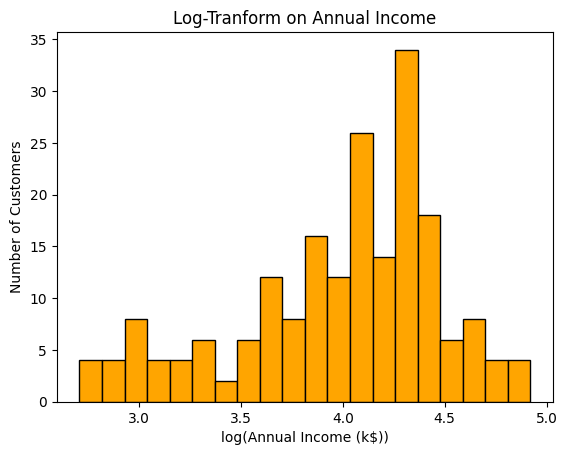

In [248]:
customers['log_Annual Income (k$)'] = np.log(customers['Annual Income (k$)'])
plt.hist(customers['log_Annual Income (k$)'] , bins = 20 , edgecolor = 'black', color = 'Orange')
plt.xlabel('log(Annual Income (k$))')
plt.ylabel('Number of Customers')
plt.title('Log-Tranform on Annual Income')
plt.show()

In [249]:
print(skew(customers['log_Annual Income (k$)']))

-0.7539190036050597


applying log-transform has increases the skew instead of reducing t thus we will not consider log-transform for annual income

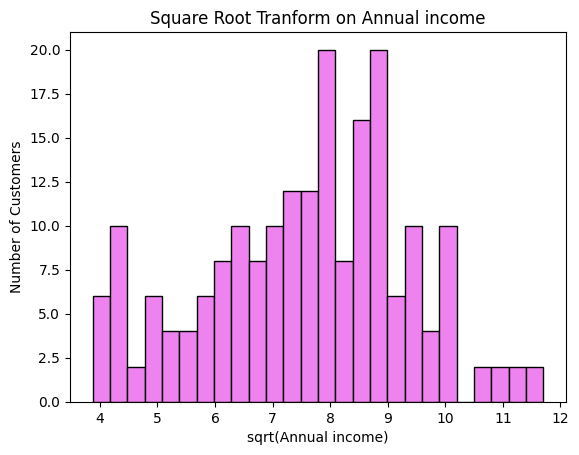

In [250]:
customers['sqrt_Annual_income'] = np.sqrt(customers['Annual Income (k$)'])
plt.hist(customers['sqrt_Annual_income'] , bins = 26 , edgecolor = 'black', color = 'Violet')
plt.xlabel('sqrt(Annual income)')
plt.ylabel('Number of Customers')
plt.title('Square Root Tranform on Annual income')
plt.show()

In [251]:
print(skew(customers['sqrt_Annual_income']))

-0.22855874343278354


using sqrt-transform as somewhat reduced skew from +0.321 to -0.228

Normalisation of features
Standard Normalisation : (Mean of Data Set becomes zero and Variance becomes Unity) :

In [252]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
customers['log_Age_std'] = std_scaler.fit_transform(customers[['log_Age']])

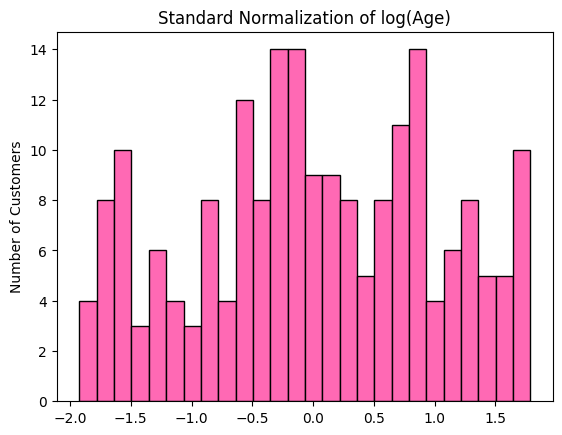

In [253]:
plt.hist(customers['log_Age_std'], edgecolor = 'black' , bins = 26 , color = 'hotpink')
plt.ylabel('Number of Customers')
plt.title('Standard Normalization of log(Age)')
plt.show()

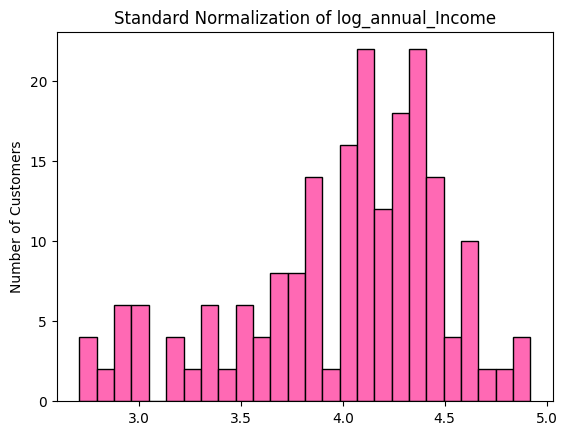

In [254]:
customers['std_log_Annual Income (k$)'] = std_scaler.fit_transform(customers[['log_Annual Income (k$)']])
plt.hist(customers['log_Annual Income (k$)'], edgecolor = 'black' , bins = 26 , color = 'hotpink')
plt.ylabel('Number of Customers')
plt.title('Standard Normalization of log_annual_Income')
plt.show()

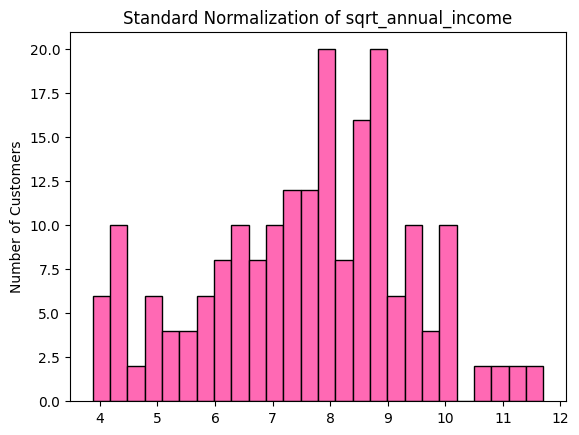

In [255]:
customers['std_sqrt_Annual_income'] = std_scaler.fit_transform(customers[['sqrt_Annual_income']])
plt.hist(customers['sqrt_Annual_income'], edgecolor = 'black' , bins = 26 , color = 'hotpink')
plt.ylabel('Number of Customers')
plt.title('Standard Normalization of sqrt_annual_income')
plt.show()

Min-Max Normalisation : Scales all the Data in the range (0,1) :

In [256]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
customers['log_Age_minmax'] = min_max_scaler.fit_transform(customers[['log_Age']])

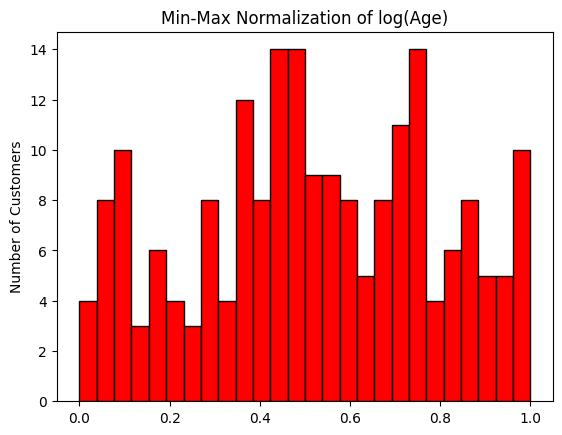

In [257]:
plt.hist(customers['log_Age_minmax'], edgecolor = 'black' , bins = 26 , color = 'red')
plt.ylabel('Number of Customers')
plt.title('Min-Max Normalization of log(Age)')
plt.show()

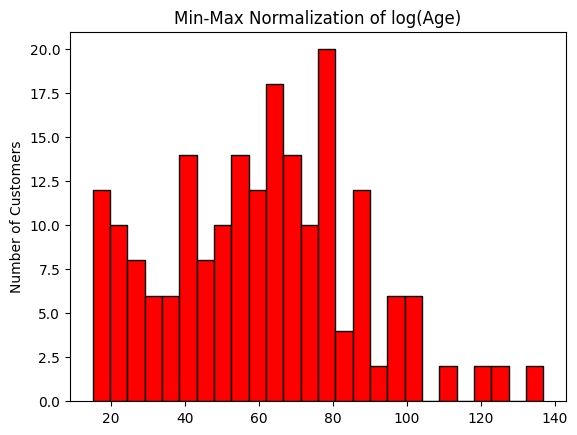

In [258]:
customers['log_Annual_income_minmax'] = min_max_scaler.fit_transform(customers[['log_Annual Income (k$)']])
plt.hist(customers['Annual Income (k$)'], edgecolor = 'black' , bins = 26 , color = 'red')
plt.ylabel('Number of Customers')
plt.title('Min-Max Normalization of log(Age)')
plt.show()

In [259]:
print(skew(customers['log_Annual_income_minmax']))
print(skew(customers['std_log_Annual Income (k$)']))
print(skew(customers['Annual Income (k$)']))

-0.7539190036050587
-0.7539190036050575
0.319423684276314


now for Spending Score


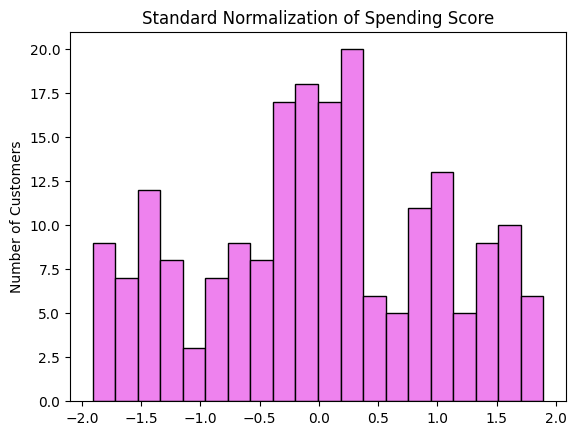

In [260]:
customers['Spending Score std'] = std_scaler.fit_transform(customers[['Spending Score (1-100)']])
plt.hist(customers['Spending Score std'], edgecolor = 'black' , bins = 20 , color = 'violet')
plt.ylabel('Number of Customers')
plt.title('Standard Normalization of Spending Score')
plt.show()

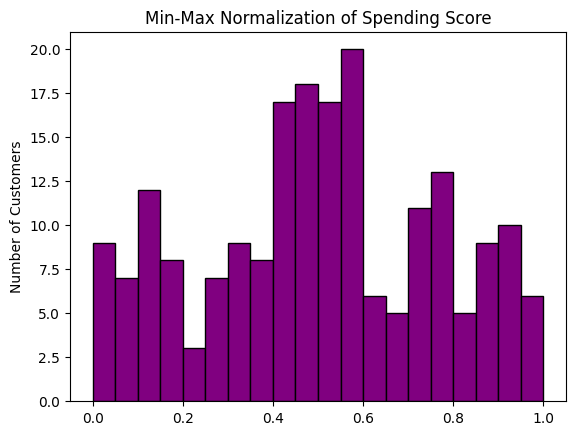

In [261]:
customers['Spending Score min-max'] = min_max_scaler.fit_transform(customers[['Spending Score (1-100)']])
plt.hist(customers['Spending Score min-max'], edgecolor = 'black' , bins = 20 , color = 'purple')
plt.ylabel('Number of Customers')
plt.title('Min-Max Normalization of Spending Score')
plt.show()

viewing normalisied data

In [262]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),log_Age,log_Annual Income (k$),sqrt_Annual_income,log_Age_std,std_log_Annual Income (k$),std_sqrt_Annual_income,log_Age_minmax,log_Annual_income_minmax,Spending Score std,Spending Score min-max
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,2.000000e+02,2.000000e+02,2.000000e+02,200.000000,200.000000,2.000000e+02,200.000000
mean,100.500000,38.850000,60.560000,50.200000,3.594166,3.991378,7.581243,5.773160e-16,-7.105427e-16,-4.263256e-16,0.518211,0.580184,-1.465494e-16,0.502041
std,57.879185,13.969007,26.264721,25.823522,0.367069,0.507336,1.760753,1.002509e+00,1.002509e+00,1.002509e+00,0.270277,0.229364,1.002509e+00,0.263505
min,1.000000,18.000000,15.000000,1.000000,2.890372,2.708050,3.872983,-1.922144e+00,-2.535888e+00,-2.111349e+00,0.000000,0.000000,-1.910021e+00,0.000000
25%,50.750000,28.750000,41.500000,34.750000,3.358523,3.725472,6.441694,-6.435681e-01,-5.254368e-01,-6.488180e-01,0.344704,0.459970,-5.997931e-01,0.344388
50%,100.500000,36.000000,61.500000,50.000000,3.583519,4.119004,7.842129,-2.907786e-02,2.521926e-01,1.485388e-01,0.510371,0.637883,-7.764312e-03,0.500000
75%,150.250000,49.000000,78.000000,73.000000,3.891820,4.356709,8.831761,8.129292e-01,7.219031e-01,7.119996e-01,0.737377,0.745348,8.851316e-01,0.734694
max,200.000000,70.000000,137.000000,99.000000,4.248495,4.919981,11.704700,1.787050e+00,1.834943e+00,2.347747e+00,1.000000,1.000000,1.894492e+00,1.000000


As we can observe from above table, mean for 'log_Age_std' , 'Annual_Income_std' , 'Spending Score std' is approximately zero. Also, the Standard Deviation (and hence the variance) is approxiamtely Unity. This is what Standard Scaler Normalisation does.


Also, we can observe from above table that the minimum and maximum values of 'log_Age_minmax' , 'Annual_Income_min_max' , 'Spending Score min-max' are 0 and 1 respectively for all.

making new CSV file

In [263]:
customers.to_csv('new_customers_data.csv')

K-means Clustering on Spending Score v/s Annual income :

In [264]:
from sklearn.cluster import KMeans

In [265]:
v1 = customers[['Annual Income (k$)', 'Spending Score (1-100)']]

elbow method to find K

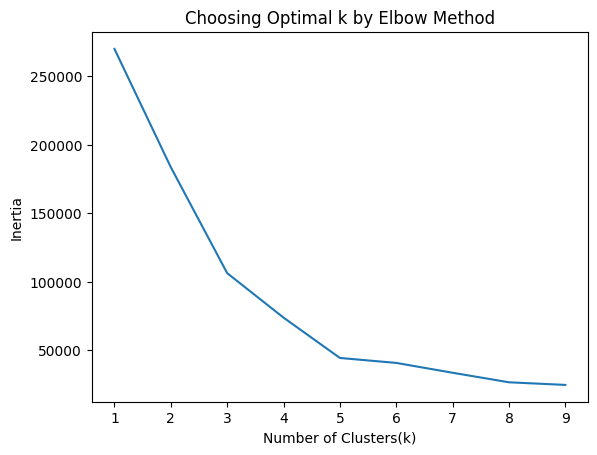

In [266]:
inertia = []
range_k = range(1,10)
for k in range_k:
    k_means = KMeans(n_clusters=k , random_state=42)
    k_means.fit(v1)
    inertia.append(k_means.inertia_)

plt.plot(range_k, inertia)
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Inertia')
plt.title('Choosing Optimal k by Elbow Method')
plt.show()

From above Elbow Curve, we start getting minimum value of inertia at k=4. Hence, k=5 can be chosen as an optimal value for clustering.

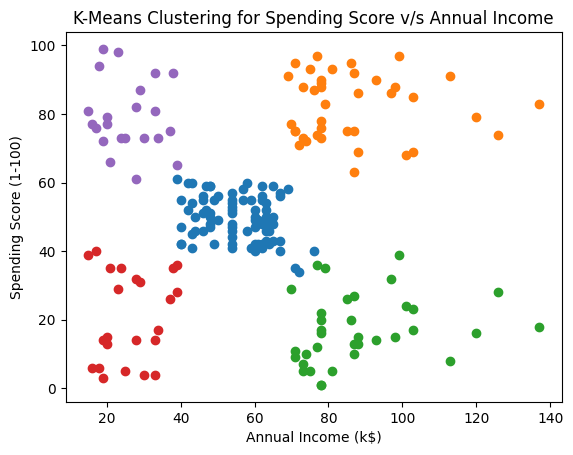

In [267]:
k = 5
k_means = KMeans(n_clusters = k , random_state = 0)
customers['Cluster2'] = k_means.fit_predict(v1)
for cluster in range(k):
    cluster_data = customers[customers['Cluster2'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'] , cluster_data['Spending Score (1-100)'] , label = f"cluster{cluster}")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering for Spending Score v/s Annual Income')
plt.show()

In [268]:
print(k_means.cluster_centers_)

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]


In [269]:
labels = k_means.labels_
counts = np.bincount(labels)
for i, count in enumerate(counts):
    print(f"Cluster {i}: {count} data points")

Cluster 0: 81 data points
Cluster 1: 39 data points
Cluster 2: 35 data points
Cluster 3: 23 data points
Cluster 4: 22 data points


Describing Each Segment :
From the above clustering, we get an important information related to customer segmentation.
The customers can be categorised into 5 major classes :
1. Low Income Low Spending Class (in Red)
2. Low Income High Spending Class (in Purple)
3. Middle Income Middle Spending Class (in Blue) ==> This class has largest number of customers , i.e 81.
4. High Income Low Spending Class (in Green)
5. High Income High Spending Class (in Orange)